# STOCK PRICE PREDICTION OF RELIANCE COMPANY(1 yr data)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
rel_1yr=pd.read_csv('rel_1.csv')
rel_1yr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-15,1189.678955,1224.299561,1131.928589,1139.209229,1134.948486,842092.0
1,2020-04-16,1135.791748,1176.157715,1135.791748,1157.683472,1153.353638,597698.0
2,2020-04-17,1208.499878,1218.306641,1181.457275,1213.502319,1208.963623,564636.0
3,2020-04-20,1214.938599,1245.151123,1190.966797,1232.719482,1228.109009,803967.0
4,2020-04-21,1196.712036,1240.743042,1153.473511,1224.398682,1219.819214,1158176.0
...,...,...,...,...,...,...,...
246,2021-04-07,1992.199951,2046.099976,1992.199951,2002.800049,2002.800049,281524.0
247,2021-04-08,2010.050049,2021.150024,1993.500000,2005.000000,2005.000000,1534983.0
248,2021-04-09,2003.000000,2006.800049,1980.099976,1982.650024,1982.650024,241161.0
249,2021-04-12,1956.050049,1966.250000,1900.550049,1911.300049,1911.300049,666100.0


# EXPLORATORY rel_1yr ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF DATASET
rel_1yr.shape

(251, 7)

In [4]:
#CHECKING NULL VALUES IN DATASET
rel_1yr.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
rel_1yr[rel_1yr.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
150,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#SINCE THE DATASET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
rell_1yr=rel_1yr.dropna()
rell_1yr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-15,1189.678955,1224.299561,1131.928589,1139.209229,1134.948486,842092.0
1,2020-04-16,1135.791748,1176.157715,1135.791748,1157.683472,1153.353638,597698.0
2,2020-04-17,1208.499878,1218.306641,1181.457275,1213.502319,1208.963623,564636.0
3,2020-04-20,1214.938599,1245.151123,1190.966797,1232.719482,1228.109009,803967.0
4,2020-04-21,1196.712036,1240.743042,1153.473511,1224.398682,1219.819214,1158176.0
...,...,...,...,...,...,...,...
246,2021-04-07,1992.199951,2046.099976,1992.199951,2002.800049,2002.800049,281524.0
247,2021-04-08,2010.050049,2021.150024,1993.500000,2005.000000,2005.000000,1534983.0
248,2021-04-09,2003.000000,2006.800049,1980.099976,1982.650024,1982.650024,241161.0
249,2021-04-12,1956.050049,1966.250000,1900.550049,1911.300049,1911.300049,666100.0


In [7]:
rell_1yr.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF DATASET
rell_1yr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1934.831346,1959.976833,1904.624173,1930.261722,1929.047439,8.297542e+05
std,261.365021,259.438015,258.174416,257.535409,259.491071,5.638738e+05
min,1135.791748,1176.157715,1131.928589,1139.209229,1134.948486,1.577130e+05
25%,1846.399963,1905.899963,1825.949982,1849.937469,1849.937469,4.210898e+05
50%,1994.375000,2015.099976,1975.150024,1992.775024,1992.775024,6.681035e+05
75%,2108.000000,2132.649902,2074.325012,2104.937439,2104.937439,1.074535e+06
max,2323.699951,2368.800049,2311.750000,2323.850098,2323.850098,2.929255e+06


In [9]:
#INFORMATION ABOUT DATASET
rell_1yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.6+ KB


In [10]:
#GROUPING OF TWO SPECIFIC COLUMNS, DATE AND CLOSE
relll_1yr = rell_1yr.groupby('Date')[['Close']].mean()


In [11]:
relll_1yr

,Close
Date,
2020-04-15,1139.209229
2020-04-16,1157.683472
2020-04-17,1213.502319
2020-04-20,1232.719482
2020-04-21,1224.398682
...,...
2021-04-07,2002.800049
2021-04-08,2005.000000
2021-04-09,1982.650024


In [12]:
type(rell_1yr.Date[0])

str

In [13]:
rell_1yr['Date'] = pd.to_datetime(rell_1yr['Date'], format='%Y-%m-%d')

In [14]:
type(rell_1yr.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

# VISUALIZATION OF DATASET

Text(0, 0.5, 'Price')

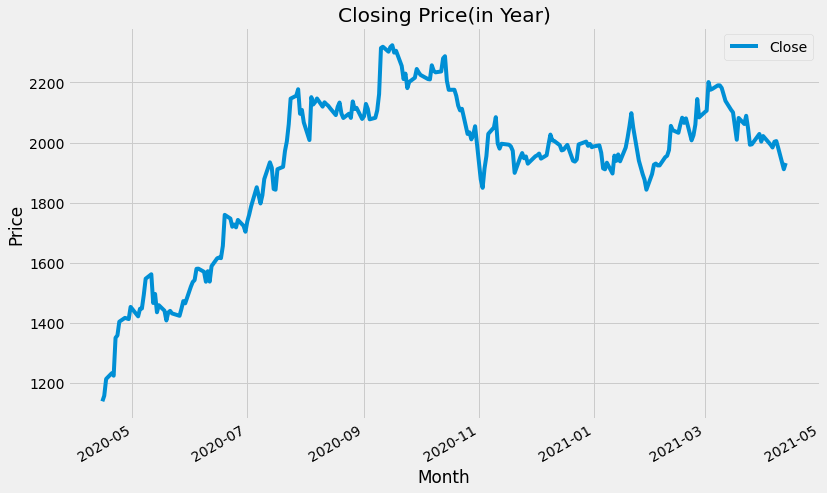

In [15]:
#plotting the graph with date againts closing price(in month)
rell_1yr.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [16]:
relll_1yr

,Close
Date,
2020-04-15,1139.209229
2020-04-16,1157.683472
2020-04-17,1213.502319
2020-04-20,1232.719482
2020-04-21,1224.398682
...,...
2021-04-07,2002.800049
2021-04-08,2005.000000
2021-04-09,1982.650024


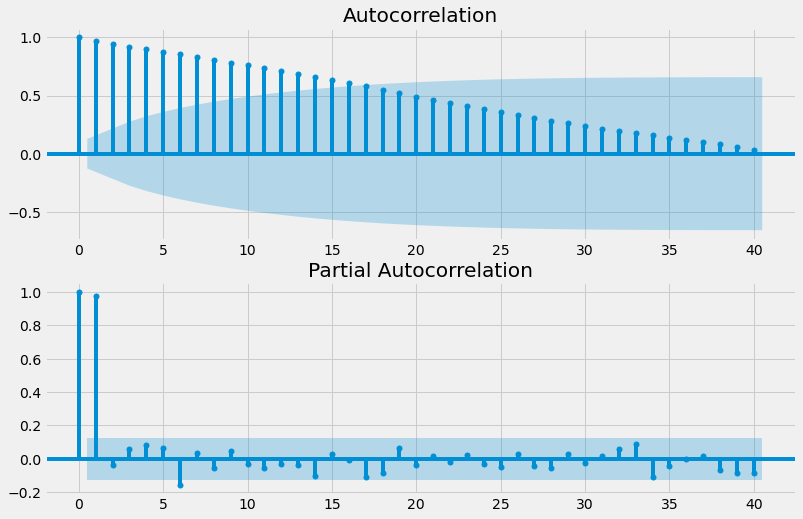

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(relll_1yr['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(relll_1yr['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [18]:
test_result=adfuller(relll_1yr['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_1yr has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
adfuller_test(relll_1yr['Close'])

ADF Test Statistic : -3.214371756533369
p-value : 0.019167712246555405
#Lags Used : 0
Number of Observations Used : 249
strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_1yr has no unit root and is stationary


In [20]:
relll_1yr['Close First Difference'] = relll_1yr['Close'] - relll_1yr['Close'].shift(1)
relll_1yr['Close'].shift(1)


Date
2020-04-15            NaN
2020-04-16    1139.209229
2020-04-17    1157.683472
2020-04-20    1213.502319
2020-04-21    1232.719482
                 ...     
2021-04-07    1983.650024
2021-04-08    2002.800049
2021-04-09    2005.000000
2021-04-12    1982.650024
2021-04-13    1911.300049
Name: Close, Length: 250, dtype: float64

ADF Test Statistic : -15.311121195865043
p-value : 4.185107712907233e-28
#Lags Used : 0
Number of Observations Used : 248
strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_1yr has no unit root and is stationary


Text(0.5, 1.0, 'Reliance 1 year')

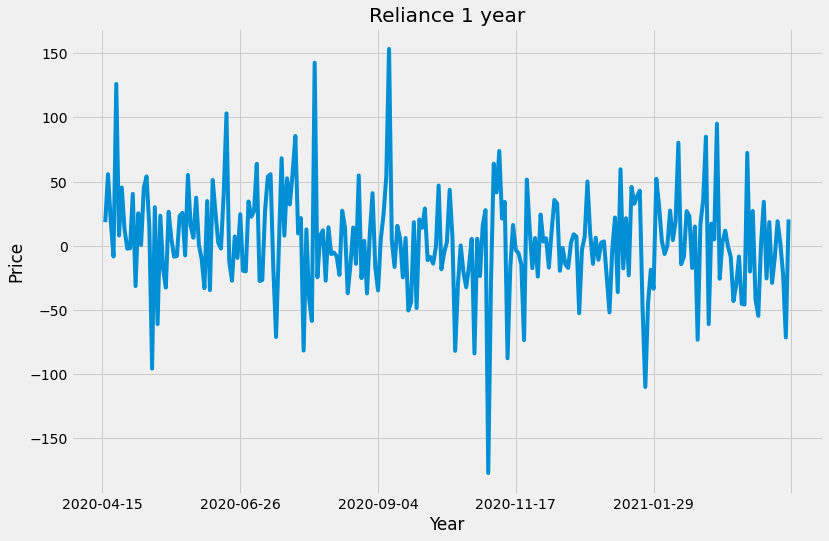

In [21]:

adfuller_test(relll_1yr['Close First Difference'].dropna())
relll_1yr['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Reliance 1 year')

AUTO ARIMA FUNCTION

In [22]:
stepwise_fit = auto_arima(relll_1yr['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2545.334, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2699.449, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2636.688, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2539.548, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2541.514, Time=0.35 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2541.511, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2543.359, Time=0.57 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 2.366 seconds


ARIMA MODEL(TRAINING AND TESTING OF DATA)

In [23]:
train_rel_1yr, test_rel_1yr = relll_1yr[0:int(len(relll_1yr)*0.7)], relll_1yr[int(len(relll_1yr)*0.7):]
training_rel_1yr = train_rel_1yr['Close'].values
test_rel_1yr = test_rel_1yr['Close'].values
history = [x for x in training_rel_1yr]
model_predictions = []
N_test_observations = len(test_rel_1yr)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_rel_1yr[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_rel_1yr, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 1479.24233818627


FORECASTING

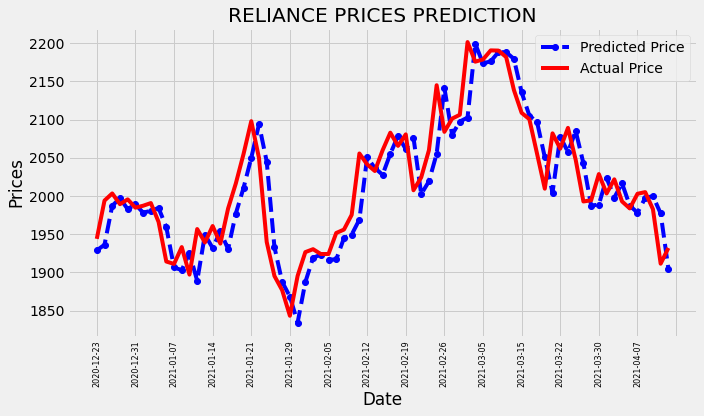

In [24]:
test_set_range = relll_1yr[int(len(relll_1yr)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_rel_1yr, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), relll_1yr.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

PREDICTION OF FUTURE PRICES

In [25]:
pred=model_fit.predict(start=len(relll_1yr),end=len(relll_1yr)+30,typ='levels')
print(pred)

[1904.797372   1898.21535572 1891.55400019 1884.81330538 1877.99327131
 1871.09389797 1864.11518536 1857.05713349 1849.91974235 1842.70301194
 1835.40694227 1828.03153333 1820.57678512 1813.04269764 1805.4292709
 1797.73650489 1789.96439962 1782.11295507 1774.18217126 1766.17204819
 1758.08258584 1749.91378423 1741.66564335 1733.33816321 1724.93134379
 1716.44518512 1707.87968717 1699.23484996 1690.51067348 1681.70715773
 1672.82430271 1663.86210843]


In [26]:
# model performance
mse = mean_squared_error(test_rel_1yr, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_rel_1yr,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_rel_1yr, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_rel_1yr)/np.abs(test_rel_1yr))
print('MAPE: '+str(mape))

MSE: 1479.24233818627
MAE: 30.138725939532087
RMSE: 38.46091962221223
MAPE: 0.046348507714126824
